**DOMAIN:** Telecom


 • **CONTEXT:** A telecom company wants to use their historical customer data and

 leverage machine learning to predict behaviour in an attempt


**to retain customers.** The end goal is to develop focused customer retention
 programs

• **DATA DESCRIPTION**: Each row represents a customer, each column contains

customer’s attributes described on the column Metadata. The

data set includes information about:


 • Customers who left within the last month – the column is called **Churn**


• Services that each customer has signed up for – phone, multiple lines,


 internet, online security, online backup, device protection, tech support, and


streaming TV and movies


• Customer account information – how long they’ve been a customer, contract,

 payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have

 partners and dependents


 • **PROJECT OBJECTIVE**: The objective, as a data scientist hired by the telecom

 company, is to build a model that will help to identify the

potential customers who have a higher probability to churn. This will help the

company to understand the pain points and patterns of customer

churn and will increase the focus on strategising customer retention


In [ ]:
#let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.


import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# **Ensemble Technique Project**

**CSV FILES**

TelcomCustomer-Churn_1.CSV

TelcomCustomer-Churn_2_csv

# **1.Data Understanding & Exploration:** [5 Marks]

# **1.A.Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.** [1 Mark]



In [ ]:
# TelcomCustomer-Churn_1.CSV
normal = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Ensemble Technique/ET_ project/TelcomCustomer-Churn_1.csv')

# **1.B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.** [1 Mark]

In [ ]:
#TelcomCustomer-Churn_2_csv
typeH = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Ensemble Technique/ET_ project/TelcomCustomer-Churn_2.csv')


# **2.C.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**   [2 Mark]

In [ ]:

# Merge normal and typeH on 'ID' feature
merged_df = pd.merge(normal, typeH, on='customerID')

# Print the merged DataFrame
print("The merged DataFrame (normal and typeH) stored in the variable 'merged_df':")

merged_df.head()

The merged DataFrame (normal and typeH) stored in the variable 'merged_df':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **1.D.Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.** [1 Marks]

In [ ]:

# Merge the DataFrames on 'customerID'
merged_df = pd.merge(normal, typeH, on='customerID', how='inner')

# Get the list of columns from 'normal' and 'typeH' DataFrames
normal_columns = normal.columns.tolist()
typeH_columns = typeH.columns.tolist()

# Get the list of columns from the merged DataFrame
merged_columns = merged_df.columns.tolist()

# Compare if all columns from 'normal' and 'typeH' are in the merged DataFrame
columns_in_merged = all(col in merged_columns for col in normal_columns) and all(col in merged_columns for col in typeH_columns)

# Print the result
if columns_in_merged:
    print("All columns from 'normal' and 'typeH' are incorporated in the merged DataFrame.")
else:
    print("Not all columns from 'normal' and 'typeH' are incorporated in the merged DataFrame.")


All columns from 'normal' and 'typeH' are incorporated in the merged DataFrame.


In [ ]:

# Get the columns of 'normal' DataFrame
normal_columns = normal.columns
# Get the columns of 'typeH' DataFrame
typeH_columns = typeH.columns
# Get the columns of the merged DataFrame
merged_columns = merged_df.columns

# Compare the columns
print("Columns in 'normal' DataFrame:")
print(normal_columns)
print("\nColumns in 'typeH' DataFrame:")
print(typeH_columns)
print("\nColumns in merged DataFrame:")
print(merged_columns)

# Get the dimensions (number of rows and columns) of the DataFrames
normal_shape = normal.shape
typeH_shape = typeH.shape
merged_shape = merged_df.shape

# Compare the dimensions
print("\nDimensions of 'normal' DataFrame (rows, columns):", normal_shape)
print("Dimensions of 'typeH' DataFrame (rows, columns):", typeH_shape)
print("Dimensions of merged DataFrame (rows, columns):", merged_shape)


Columns in 'normal' DataFrame:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

Columns in 'typeH' DataFrame:
Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Columns in merged DataFrame:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dimensions of 'normal' DataFrame (rows, columns): (7043, 10)
Dimensions of 'typeH' DataFrame (rows, c

# **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.Data Cleaning & Analysis:** [15 Marks]

# **2.A.Impute missing/unexpected values in the DataFrame.** [2 Marks]

In [ ]:

# Assuming 'merged_df' is the DataFrame to work with

# Impute missing values
numeric_cols = merged_df.select_dtypes(include='number').columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Impute categorical columns with their modes
categorical_cols = merged_df.select_dtypes(include='object').columns
for col in categorical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode().iloc[0])

# Checking for any remaining missing values
print("Remaining missing values after imputation:")
print(merged_df.isnull().sum())

# Handling unexpected values (if any)
# For example, replacing unexpected values in a specific column 'column_name' with a specific value 'new_value'
# merged_df['column_name'] = merged_df['column_name'].replace(['unexpected_value1', 'unexpected_value2'], 'new_value')

# Checking for unexpected values (if any)
# For example, to check unique values in a column
# print("Unique values in 'column_name':")
# print(merged_df['column_name'].unique())

# You can save the cleaned DataFrame to a new CSV file if needed
# merged_df.to_csv('cleaned_merged_df.csv', index=False)


Remaining missing values after imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Iterate through each column and print value counts
for column in merged_df.columns:
    value_counts = merged_df[column].value_counts()
    print(f"Value counts in '{column}':")
    print(value_counts)
    print()

Value counts in 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts in 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts in 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts in 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts in 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No ph

In [ ]:
# Iterate through each column and print unique values
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'SeniorCitizen':
[0 1]

Unique values in 'Partner':
['Yes' 'No']

Unique values in 'Dependents':
['No' 'Yes']

Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values in 'PhoneService':
['No' 'Yes']

Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']

Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']

Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']

In [ ]:

# Calculate the percentage of null values for each feature
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Print the feature-wise percentage of null values
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [ ]:
pd.DataFrame({'Count':merged_df.isnull().sum()[merged_df.isnull().sum()>0],'Percentage':(merged_df.isnull().sum()[merged_df.isnull().sum()>0]/merged_df.shape[0])*100})

,Count,Percentage


-------------------------------------------------------------------------------

# **2 B. Make sure all the variables with continuous values are of ‘Float’ type.** [2 Marks]

In [ ]:

# Assuming 'merged_df' is the DataFrame to work with

# Check the data types of columns
print("Data types before conversion:")
print(merged_df.dtypes)

# Identify numerical columns
numeric_cols = merged_df.select_dtypes(include='number').columns

# Convert numerical columns to float
merged_df[numeric_cols] = merged_df[numeric_cols].astype(float)

# Check data types after conversion
print("\nData types after conversion:")
print(merged_df.dtypes)

# You can save the updated DataFrame to a new CSV file if needed
# merged_df.to_csv('updated_merged_df.csv', index=False)


Data types before conversion:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data types after conversion:
customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
Te

# **2 C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.** [4 Marks]


 →You have to define a function and within that create a loop to select columns that are object type.
 Exclude unnecessary columns. Calculate the % within the loop and plot a pie chart within the loop.
 Hint: use value_counts to calculate the % of distribution for pie chart

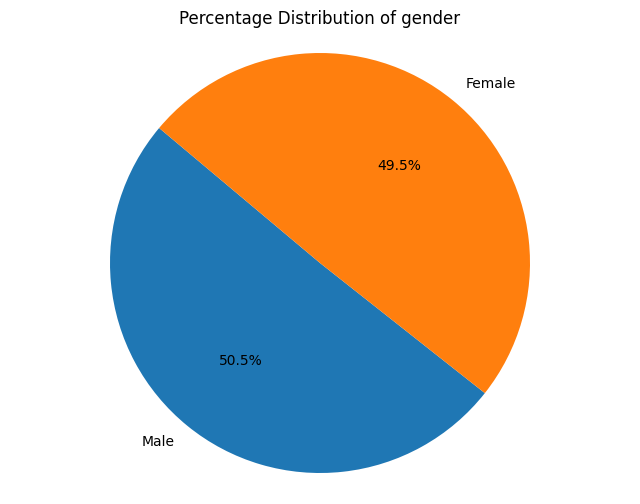

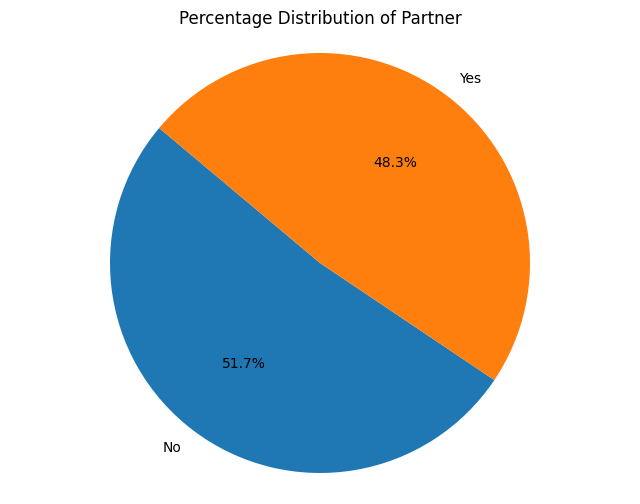

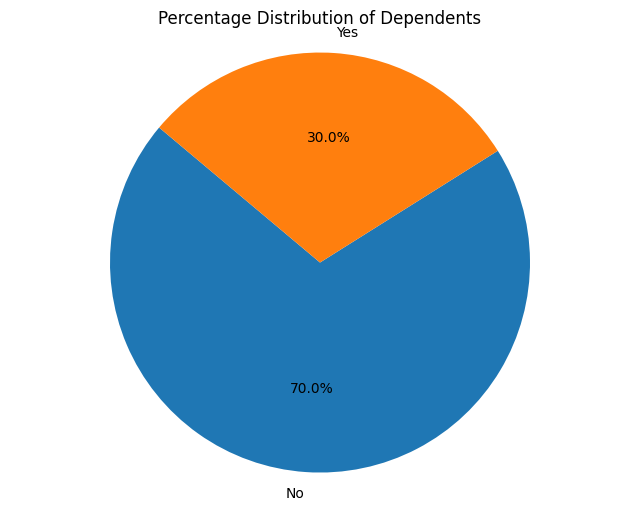

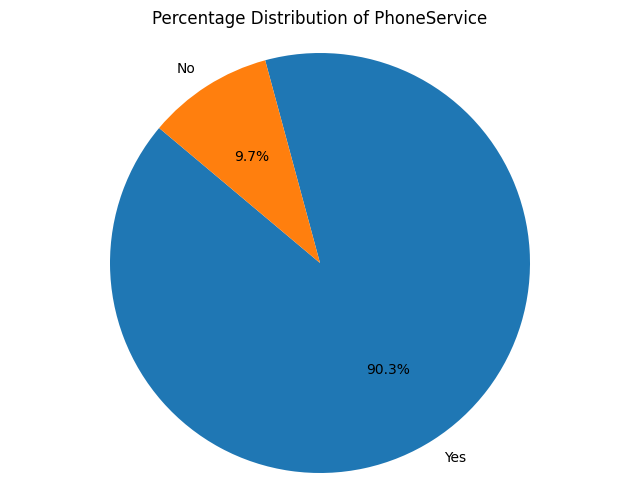

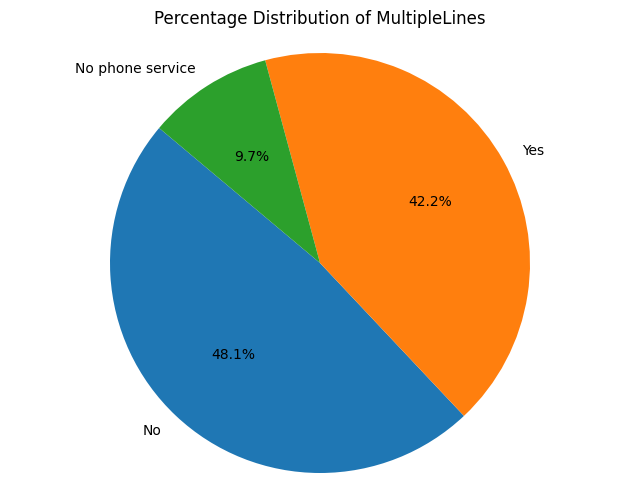

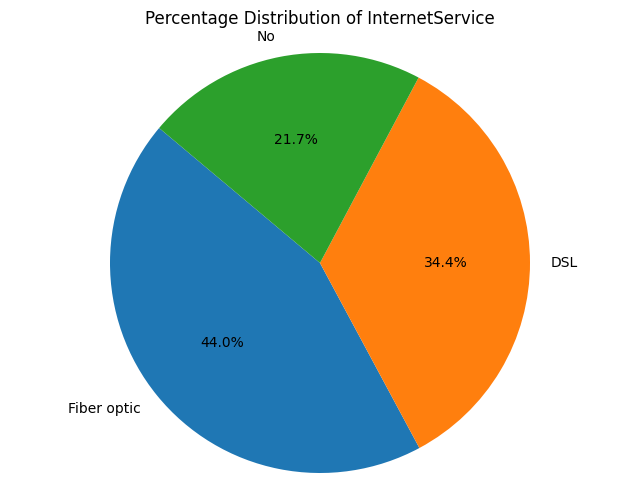

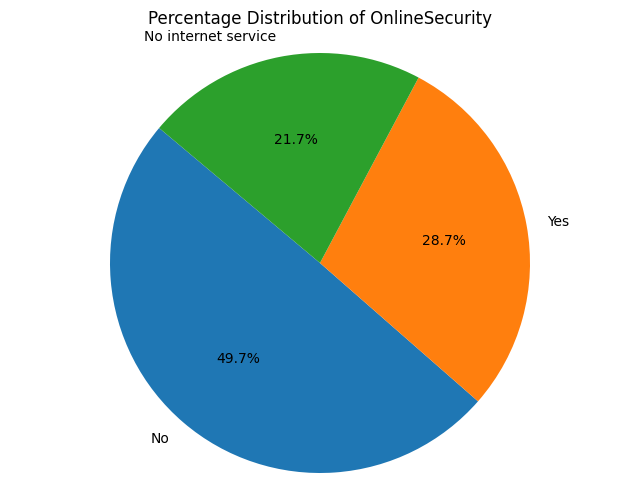

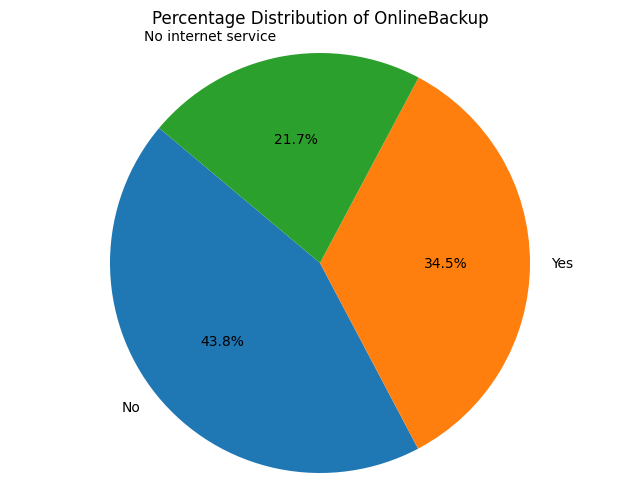

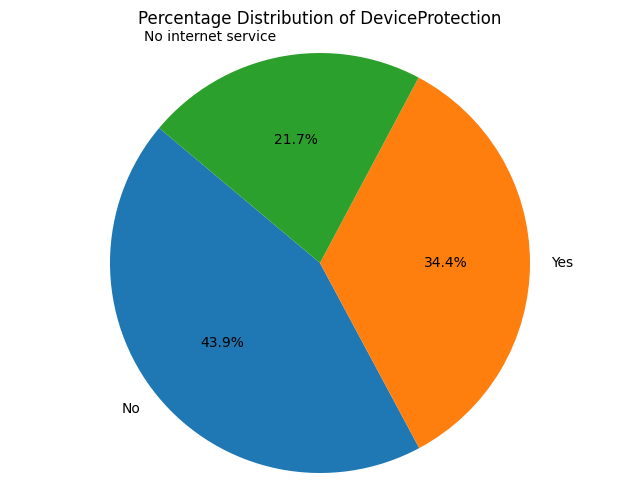

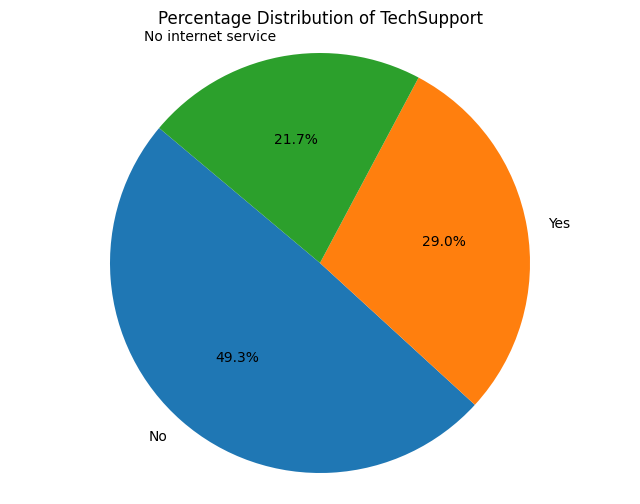

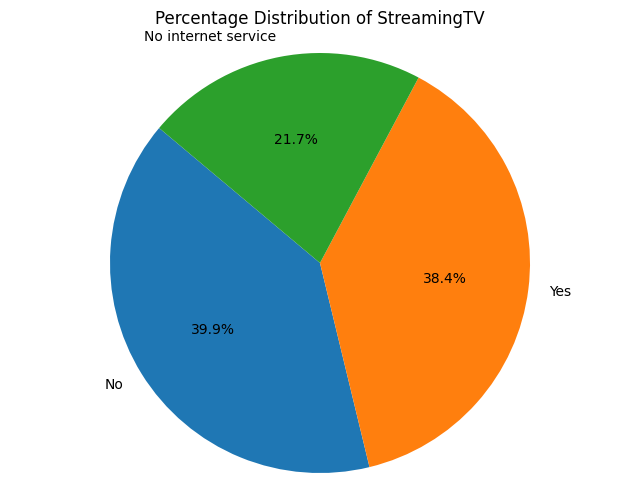

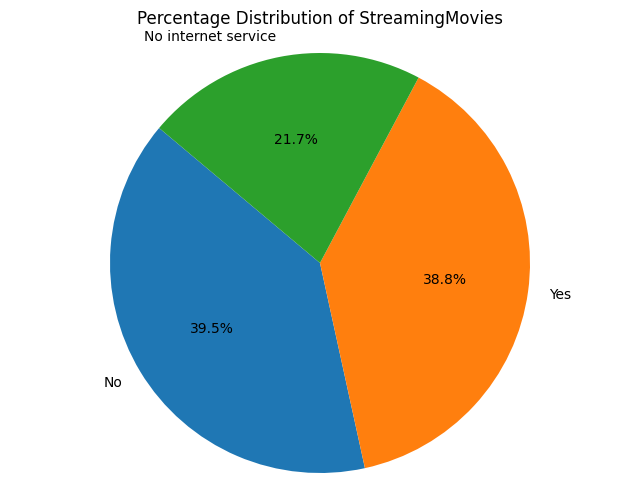

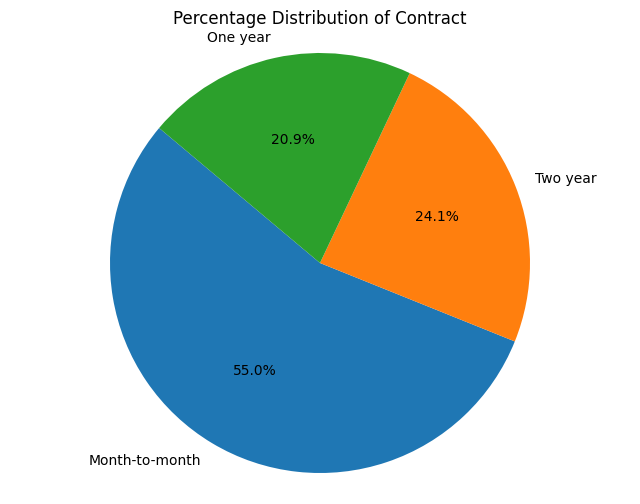

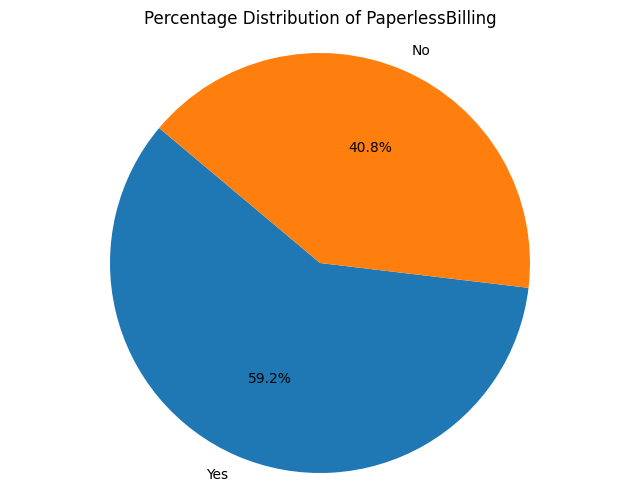

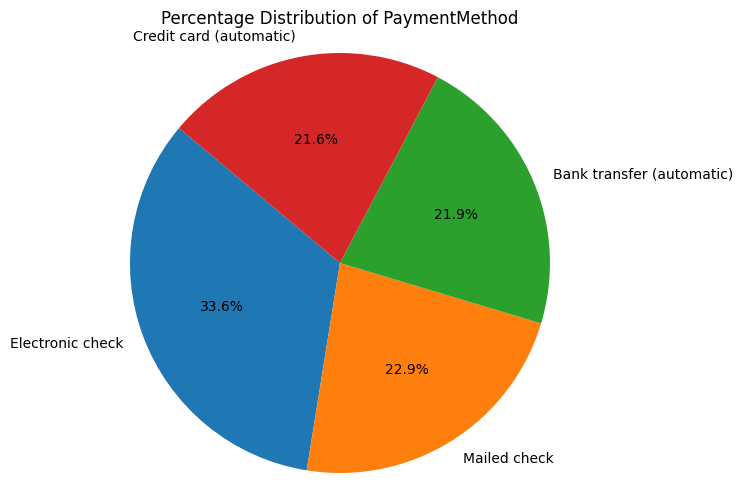

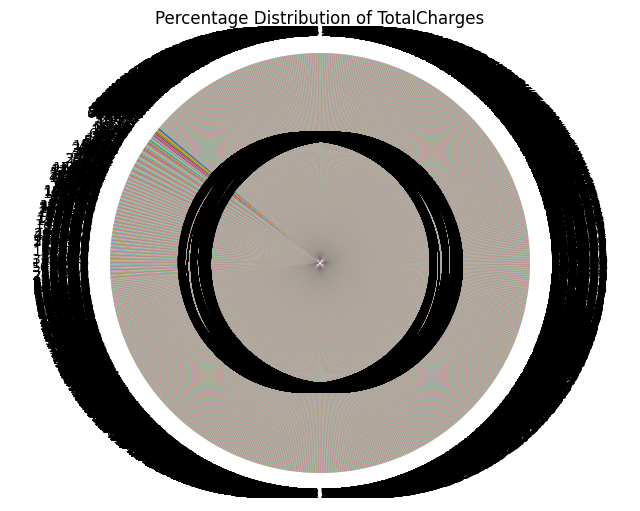

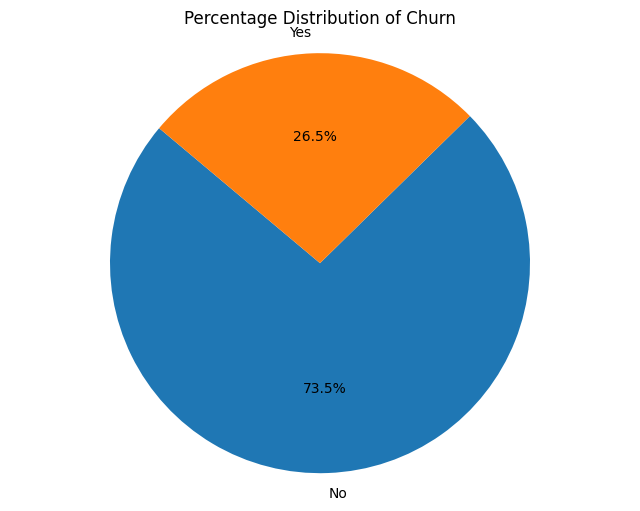

In [ ]:
def plot_categorical_pie_charts(dataframe):
    # Get list of object type columns (categorical columns)
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    # List of columns to exclude, if any
    exclude_columns = ['customerID']  # Add columns to exclude if needed

    # Loop through each categorical column
    for column in categorical_columns:
        # Skip columns to exclude
        if column in exclude_columns:
            continue

        # Calculate value counts for the column
        value_counts = dataframe[column].value_counts()

        # Calculate percentage for each unique value
        percentages = (value_counts / value_counts.sum()) * 100

        # Plot the pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Percentage Distribution of {column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

# Example usage:
# Assuming merged_df is your DataFrame
# Call the function to plot pie charts for categorical columns
plot_categorical_pie_charts(merged_df)

# **2.D.Share insights for Q2.c ( ABOVE PIECHART)** ( 2 MARKS)



# **Insight on above Piechart**



Unique values in 'gender':

['Female' 'Male']

---- A telecom company has number of customers which include

   female- 49.5 %

   male --50.5 %

-------------------------------------------------------------------------

Unique values in 'Partner':

['Yes' 'No']

percentage distribution of partener inclue

yes -48.3 %

No- 51.7 %

------------------------------------------------------------

Unique values in 'Dependents':

['No' 'Yes']

percentage distribution of Dependents inclue

NO - 70%

yes- 30 %

-------------------------------------------------------------------------------


percentage distribution in 'PhoneService':

customer has used phoneservices in percentage

['No' 'Yes']

NO - 9.7%

yes- 90.3%

----------------------------------------------------------------------

percentage distribution in 'MultipleLines':

[ 'No phone service- 9.7 % '    'No - 48.1 % '   'Yes-42.2% ' ]

-------------------------------------------------------------------------


percentage distribution in 'InternetService':

[ 'DSL-34.4% '  'Fiber optic-44% '  'No-21.7% ' ]

-----------------------------------------------------------------------


percentage distribution in 'OnlineSecurity'

[ 'No- 49.7 %'  'Yes -28.7% '  'No internet service -21.7%' ]

-------------------------------------------------------------------

percentage distribution in 'OnlineBackup':

[  'Yes-34.5%'   'No-43.8%'   'No internet service-21.7%'  ]

---------------------------------------------------------------------

percentage distribution in 'DeviceProtection':

['No-43.9%' 'Yes-34.4%' 'No internet service -21.7%']

-------------------------------------------------------------------------

percentage distribution in 'TechSupport':

[ 'No-49.3%'  'Yes-29% '  'No internet service-21.7% ' ]

--------------------------------------------------------------------

percentage distribution in 'StreamingTV':

[ 'No-39.9%'  'Yes-38.4% '  'No internet service-21.7%' ]

-----------------------------------------------------------------------

percentage distribution in 'StreamingMovies':

[ 'No-39.5% '  'Yes-38.8% '  'No internet service-21.7% ' ]

-------------------------------------------------------------------------

percentage distribution in 'Contract':

[ 'Month-to-month-55% '  'One year-20.9% '  'Two year-24.1% ' ]

---------------------------------------------------------------------

percentage distribution in 'PaperlessBilling':

[ 'Yes-59.2% '  'No-40.8% ' ]

-------------------------------------------------------------------------

percentage distribution in 'PaymentMethod':

[ 'Electronic check-33.6%'  'Mailed check-22.9%'    

      'Bank transfer (automatic)-21.9%'

      'Credit card (automatic)-21.6%']


 ---------------------------------------------------------------------

percentage distribution in 'Churn':

[ 'No-73.5 % '  'Yes-26.5% ' ]


--------------------------------------------------------------------------










# **2.E.Encode all the appropriate Categorical features with the best suitable approach.** [2 Marks]

Lets convert the columns with an 'object' datatype into categorical variables

In [ ]:
for feature in merged_df.columns: # Loop through all columns in the dataframe
    if merged_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        merged_df[feature] = pd.Categorical(merged_df[feature])# Replace strings with an integer
merged_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
replaceStruct = {
    "Gender": {"Male": 1, "Female": 0},
    "Partner": {"Yes": 1, "No": 0},
    "Dependents": {"Yes": 1, "No": 0},
    "PhoneService": {"Yes": 1, "No": 0},
    "PaperlessBilling": {"Yes": 1, "No": 0},
    "Churn": {"Yes": 1, "No": 0},
    "StreamingTV": {"Yes": 1, "No": 0, "No internet service": -1},
    "StreamingMovies": {"Yes": 1, "No": 0, "No internet service": -1},
    "OnlineSecurity": {"Yes": 1, "No": 0, "No internet service": -1},
    "OnlineBackup": {"Yes": 1, "No": 0, "No internet service": -1},
    "MultipleLines": {"Yes": 1, "No": 0, "No phone service": -1},
    "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": -1},
    "TechSupport": {"Yes": 1, "No": 0, "No internet service": -1}
}

oneHotCols = ["PaymentMethod", "Contract", "InternetService"]

In [ ]:
merged_df=merged_df.replace(replaceStruct)
merged_df=pd.get_dummies(merged_df, columns=oneHotCols)
merged_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0.0,1,0,1.0,0,-1,0,1,...,False,False,True,False,True,False,False,True,False,False
1,5575-GNVDE,Male,0.0,0,0,34.0,1,0,1,0,...,False,False,False,True,False,True,False,True,False,False
2,3668-QPYBK,Male,0.0,0,0,2.0,1,0,1,1,...,False,False,False,True,True,False,False,True,False,False
3,7795-CFOCW,Male,0.0,0,0,45.0,0,-1,1,0,...,True,False,False,False,False,True,False,True,False,False
4,9237-HQITU,Female,0.0,0,0,2.0,1,0,0,0,...,False,False,True,False,True,False,False,False,True,False
5,9305-CDSKC,Female,0.0,0,0,8.0,1,1,0,0,...,False,False,True,False,True,False,False,False,True,False
6,1452-KIOVK,Male,0.0,0,1,22.0,1,1,0,1,...,False,True,False,False,True,False,False,False,True,False
7,6713-OKOMC,Female,0.0,0,0,10.0,0,-1,1,0,...,False,False,False,True,True,False,False,True,False,False
8,7892-POOKP,Female,0.0,1,0,28.0,1,1,0,0,...,False,False,True,False,True,False,False,False,True,False
9,6388-TABGU,Male,0.0,0,1,62.0,1,0,1,1,...,True,False,False,False,False,True,False,True,False,False


-------------------------------------------------------------------------------

# **2.F.Split the data into 80% train and 20% test.** [1 Marks]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'merged_df' is your DataFrame containing the data
# X contains the features, excluding the 'Churn' column
X = merged_df.drop("Churn", axis=1)

# y contains the target variable 'Churn'
y = merged_df['Churn']

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shape of the resulting train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5634, 20)
Shape of X_test: (1409, 20)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


# **2.G.Normalize/Standardize the data with the best suitable approach.** [2 Marks]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'numeric_cols' are the numerical columns from previous steps

# Create MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalize using MinMaxScaler
normalized_data = min_max_scaler.fit_transform(merged_df[numeric_cols])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

# Standardize using StandardScaler
standardized_data = standard_scaler.fit_transform(merged_df[numeric_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numeric_cols)

# Comparing the first few rows of the original, normalized, and standardized DataFrames
print("First few rows of original DataFrame:")
print(merged_df[numeric_cols].head())

print("\nFirst few rows of normalized DataFrame (MinMaxScaler):")
print(normalized_df.head())

print("\nFirst few rows of standardized DataFrame (StandardScaler):")
print(standardized_df.head())

# You can save the normalized and standardized DataFrames to new CSV files if needed
# normalized_df.to_csv('normalized_merged_df.csv', index=False)
# standardized_df.to_csv('standardized_merged_df.csv', index=False)


First few rows of original DataFrame:
   SeniorCitizen  tenure  MonthlyCharges
0            0.0     1.0           29.85
1            0.0    34.0           56.95
2            0.0     2.0           53.85
3            0.0    45.0           42.30
4            0.0     2.0           70.70

First few rows of normalized DataFrame (MinMaxScaler):
   SeniorCitizen    tenure  MonthlyCharges
0            0.0  0.013889        0.115423
1            0.0  0.472222        0.385075
2            0.0  0.027778        0.354229
3            0.0  0.625000        0.239303
4            0.0  0.027778        0.521891

First few rows of standardized DataFrame (StandardScaler):
   SeniorCitizen    tenure  MonthlyCharges
0      -0.439916 -1.277445       -1.160323
1      -0.439916  0.066327       -0.259629
2      -0.439916 -1.236724       -0.362660
3      -0.439916  0.514251       -0.746535
4      -0.439916 -1.236724        0.197365


# **------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.Model building and performance improvement :** [40 Marks]

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

# **3.A.Train a model using Decision tree and check the performance of the model on train and test data** ( 4 marks )

**Build Decision Tree Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the shapes of X_train, y_train, X_test, y_test
print("Shapes of X_train, y_train, X_test, y_test:")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
try:
    clf.fit(X_train, y_train)
    print("\nDecision Tree model trained successfully.")
except Exception as e:
    print("\nError during training:", e)

# Making predictions on the training and testing data
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the accuracy scores
print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Printing the classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, test_preds))

# If needed, you can also visualize the decision tree
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 10))
# plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_)
# plt.show()


Shapes of X_train, y_train, X_test, y_test:
(5634, 13604) (5634,) (1409, 13604) (1409,)

Decision Tree model trained successfully.

Training Accuracy: 1.0
Testing Accuracy: 0.7806955287437899

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



# **3.B.Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data** ,
# **provide the differences observed in performance in Q3.a and Q3.b** ( 5 marks )

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to train a new model
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Making predictions on the training and testing data with the best model
train_preds = best_clf.predict(X_train)
test_preds = best_clf.predict(X_test)

# Calculating accuracy with the best model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Printing the accuracy scores with the best model
print("\nTraining Accuracy (with best model):", train_accuracy)
print("Testing Accuracy (with best model):", test_accuracy)

# Printing the classification report for testing data with the best model
print("\nClassification Report for Testing Data (with best model):")
print(classification_report(y_test, test_preds))


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7873625100669661

Training Accuracy (with best model): 0.7973020944266951
Testing Accuracy (with best model): 0.8005677785663591

Classification Report for Testing Data (with best model):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.62      0.65      0.63       373

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



# **Observation in performanace**

#      without grid search


**Training Accuracy:** 1.0

**Testing Accuracy**: 0.7806955287437899


**Classification Report for Testing Data:**

                      precision        recall      f1-score         support

           0           0.83              0.89        0.86             1036

           1           0.61              0.49        0.54             373

    accuracy                              0.78      1409





                      


macro avg              0.72              0.69       0.70          1409



weighted avg          0.77             0.78       0.77          1409:




```

```






#   using grid search



**Best Parameters:**  {'criterion':  'entropy',  'max_depth': 5,  
'min_samples_leaf':

1, 'min_samples_split': 2}

**Best Score:** 0.7873625100669661


**Training Accuracy** (with best model): 0.7973020944266951

**Testing Accuracy** (with best model): 0.8005677785663591


**Classification Report for Testing Data (with best model)**:

                   precision    recall  f1-score   support


           0       0.87      0.85      0.86      1036
           
           1       0.62      0.65      0.63       373

    accuracy                           0.80      1409

   macro avg       0.74      0.75      0.75      1409

weighted avg       0.80      0.80      0.80      1409



# **----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.C.Train a model using Random forest  and check the performance of the model on train and test data** ( 4 marks )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Training the Random Forest model
clf.fit(X_train, y_train)

# Making predictions on the training and testing data
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the accuracy scores
print("Training Accuracy (Random Forest):", train_accuracy)
print("Testing Accuracy (Random Forest):", test_accuracy)

# Printing the classification report for testing data
print("\nClassification Report for Testing Data (Random Forest):")
print(classification_report(y_test, test_preds))


Training Accuracy (Random Forest): 0.9998225062122825
Testing Accuracy (Random Forest): 0.8069552874378992

Classification Report for Testing Data (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



# **3.D.Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data** ,
# **provide the differences observed in performance in Q3.c and Q3.d**  ( 5 marks )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are the train and test data
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to train a new model
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Making predictions on the training and testing data with the best model
train_preds = best_rf_classifier.predict(X_train)
test_preds = best_rf_classifier.predict(X_test)

# Calculating accuracy with the best model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Printing the accuracy scores with the best model
print("\nTraining Accuracy (with best model):", train_accuracy)
print("Testing Accuracy (with best model):", test_accuracy)

# Printing the classification report for testing data with the best model
print("\nClassification Report for Testing Data (with best model):")
print(classification_report(y_test, test_preds))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7957041832873392

Training Accuracy (with best model): 1.0
Testing Accuracy (with best model): 0.808374733853797

Classification Report for Testing Data (with best model):
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



# **OBSERVATION ON PERFORMANCE**

# **WITHOUT GRID SEARCH**

Training Accuracy (Random Forest): 0.9998225062122825

Testing Accuracy (Random Forest): 0.8069552874378992

Classification Report for Testing Data (Random Forest):

precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409

   macro avg       0.76      0.70      0.72      1409

weighted avg       0.80      0.81      0.79      1409



# **USING GRID SEARCH**


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1,

'min_samples_split': 2, 'n_estimators': 200}

Best Score: 0.7957041832873392


Training Accuracy (with best model): 1.0

Testing Accuracy (with best model): 0.808374733853797


Classification Report for Testing Data (with best model):

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.49      0.57       373

    accuracy                           0.81      1409

   macro avg       0.77      0.70      0.72      1409
   
weighted avg       0.80      0.81      0.80      1409







# **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.E.Train a model using Adaboost and check the performance of the model on train and test data** ( 4 marks )

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are the train and test data
# Initialize the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
ada_classifier.fit(X_train, y_train)

# Making predictions on the training and testing data
train_preds = ada_classifier.predict(X_train)
test_preds = ada_classifier.predict(X_test)

# Calculating accuracy on training and testing data
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the accuracy scores
print("Training Accuracy (AdaBoost):", train_accuracy)
print("Testing Accuracy (AdaBoost):", test_accuracy)

# Printing the classification report for testing data
print("\nClassification Report for Testing Data (AdaBoost):")
print(classification_report(y_test, test_preds))


Training Accuracy (AdaBoost): 0.8040468583599574
Testing Accuracy (AdaBoost): 0.8069552874378992

Classification Report for Testing Data (AdaBoost):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# **3.F.Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data**

# **provide the differences observed in performance in Q3.e and Q3.f** ( 5 marks )

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to train a new model
best_clf = AdaBoostClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Making predictions on the training and testing data with the best model
train_preds = best_clf.predict(X_train)
test_preds = best_clf.predict(X_test)

# Calculating accuracy with the best model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Printing the accuracy scores with the best model
print("\nTraining Accuracy (with best model - AdaBoost):", train_accuracy)
print("Testing Accuracy (with best model - AdaBoost):", test_accuracy)

# Printing the classification report for testing data with the best model
print("\nClassification Report for Testing Data (with best model - AdaBoost):")
print(classification_report(y_test, test_preds))


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Score: 0.8004958227016191

Training Accuracy (with best model - AdaBoost): 0.8173588924387647
Testing Accuracy (with best model - AdaBoost): 0.815471965933286

Classification Report for Testing Data (with best model - AdaBoost):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# **OBSERVATION ON PERFORMANCE**

# **WITHOUT GRID SEARCH**

Training Accuracy (AdaBoost): 0.8040468583599574

Testing Accuracy (AdaBoost): 0.8069552874378992


Classification Report for Testing Data (AdaBoost):

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036

           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409

   macro avg       0.76      0.73      0.74      1409

weighted avg       0.80      0.81      0.80      1409



# **USING GRID SEARCH**


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}

Best Score: 0.8004958227016191



Training Accuracy (with best model - AdaBoost): 0.8173588924387647

Testing Accuracy (with best model - AdaBoost): 0.815471965933286


Classification Report for Testing Data (with best model - AdaBoost):

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409

   macro avg       0.77      0.74      0.75      1409
   
weighted avg       0.81      0.82      0.81      1409









# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.G.Train a model using GradientBoost and check the performance of the model on train and test data**( 4 marks )   

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column
X = merged_df.drop(columns=['Churn'])
y = merged_df['Churn']

# Preprocessing if needed (e.g., one-hot encoding for categorical variables)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
train_preds = gb_classifier.predict(X_train)
test_preds = gb_classifier.predict(X_test)

# Evaluate the model's performance
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, test_preds))


Training Accuracy: 0.8091941782037628
Testing Accuracy: 0.8112136266855926

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# **3.H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data**

# **provide the differences observed in performance in Q3.g and Q3.h** ( 5 marks )

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert 'category' columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns, drop_first=True)

# Convert 'bool' columns to integers (0 or 1)
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to train a new model
best_clf = GradientBoostingClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Making predictions on the training and testing data with the best model
train_preds = best_clf.predict(X_train)
test_preds = best_clf.predict(X_test)

# Calculating accuracy with the best model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Printing the accuracy scores with the best model
print("\nTraining Accuracy (with best model - Gradient Boosting):", train_accuracy)
print("Testing Accuracy (with best model - Gradient Boosting):", test_accuracy)

# Printing the classification report for testing data with the best model
print("\nClassification Report for Testing Data (with best model - Gradient Boosting):")
print(classification_report(y_test, test_preds))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'merged_df' is the DataFrame to work with
# Assuming 'Churn' is the target column

# Dropping the target column 'Churn' to create the feature matrix X
X = merged_df.drop(columns=['Churn'])

# Setting the target variable 'y' to the 'Churn' column
y = merged_df['Churn']

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

# Define the reduced grid of hyperparameters to search
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform Randomized Search Cross-Validation
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Use the best parameters to train a new model
best_clf = GradientBoostingClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Making predictions on the training and testing data with the best model
train_preds = best_clf.predict(X_train)
test_preds = best_clf.predict(X_test)

# Calculating accuracy with the best model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Printing the accuracy scores with the best model
print("\nTraining Accuracy (with best model - Gradient Boosting):", train_accuracy)
print("Testing Accuracy (with best model - Gradient Boosting):", test_accuracy)

# Printing the classification report for testing data with the best model
print("\nClassification Report for Testing Data (with best model - Gradient Boosting):")
print(classification_report(y_test, test_preds))


Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.8015613844580228

Training Accuracy (with best model - Gradient Boosting): 0.8237486687965921
Testing Accuracy (with best model - Gradient Boosting): 0.815471965933286

Classification Report for Testing Data (with best model - Gradient Boosting):
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.69      0.54      0.61       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



# **OBSERVATION ON PERFORMANCE**

# **WITHOUT GRID SEARCH**

Training Accuracy: 0.8091941782037628

Testing Accuracy: 0.8112136266855926


Classification Report for Testing Data:

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036

           1       0.69      0.53      0.60       373
           

    accuracy                           0.81      1409

   macro avg       0.76      0.72      0.74      1409

weighted avg       0.80      0.81      0.80      1409




# **USING GRID SEARCH**



Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

Best Score: 0.8015613844580228


Training Accuracy (with best model - Gradient Boosting): 0.8237486687965921

Testing Accuracy (with best model - Gradient Boosting): 0.815471965933286


Classification Report for Testing Data (with best model - Gradient Boosting):

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036

         Yes       0.69      0.54      0.61       373


    accuracy                           0.82      1409

   macro avg       0.77      0.73      0.74      1409
   
weighted avg       0.81      0.82      0.81      1409







# **----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.I.Provide detailed analysis of the below steps**  (4 marks ) :

## (**1) Compare the performance of each model in train stage  and test stage**

# **comparion**

**using Decision tree**

Training Accuracy (with best model): 0.7973020944266951

Testing Accuracy (with best model): 0.8005677785663591

**using Random forest**

Training Accuracy (with best model): 1.0

Testing Accuracy (with best model): 0.808374733853797

**using AdaBoost**

raining Accuracy (with best model - AdaBoost): 0.8173588924387647

Testing Accuracy (with best model - AdaBoost): 0.815471965933286


**GradientBoost model**

Training Accuracy (with best model - Gradient Boosting): 0.8237486687965921

Testing Accuracy (with best model - Gradient Boosting): 0.815471965933286




**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **(2) Provide your observation on which model performed the best**

**performance of the Adaboost model is best among other performance of model**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **3) Provide your reasoning on why the model performed best**


**using AdaBoost model**

raining Accuracy (with best model - AdaBoost): 0.8173588924387647

Testing Accuracy (with best model - AdaBoost): 0.815471965933286

this model is not overfitting and having higher accuracy in both testing and training data

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **(4) Provide your final conclusion on your observation**

**In comparison among other model**

**decision tree model**-testing and traing accuracy is good and not overfitting data

 but lower than adaboost model.

precision ,   recall , f1-score  are over 85 %


**using Random forest**

Training Accuracy (with best model): 1.0

Testing Accuracy (with best model): 0.808374733853797

its seen overfitting data


**using AdaBoost**

training Accuracy (with best model - AdaBoost): 0.8173588924387647

Testing Accuracy (with best model - AdaBoost): 0.815471965933286

testing and traing accuracy is good and  not overfitting data

 but higher  than  decision tree model.

 precision  ,  recall,  f1-score  are over 85%



 **GradientBoost model**

 Training Accuracy (with best model - Gradient Boosting): 0.8237486687965921

Testing Accuracy (with best model - Gradient Boosting): 0.815471965933286


testing and traing accuracy is good and  not overfitting data

 but lower than adaboost model.

 precision  ,  recall,  f1-score  are below 85%



**final conclusion is that we will come to know that ada boost model performed well and customer has churn percentage predicted is above 85 % due to services offered by telecom company**.


**This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention**
      
          

# **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------END--------------------------------------------------**